# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-11 19:00:10.625903


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/10/20


,12/10/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,15611014,292141,1.87
Brazil,6781799,179765,2.65
India,9796744,142185,1.45
Mexico,1217126,112326,9.23
United Kingdom,1792611,63179,3.52
Italy,1787147,62626,3.50
France,2391643,57044,2.39


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/10/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
57021,US,15165295,2020-12-08,286249.0,2546.0,215878.0,206210.428571
57020,US,14949417,2020-12-07,283703.0,1404.0,192435.0,201176.000000
57019,US,14756982,2020-12-06,282299.0,1113.0,175664.0,196235.428571
57018,US,14581318,2020-12-05,281186.0,2254.0,213881.0,190945.285714
57017,US,14367437,2020-12-04,278932.0,2607.0,227828.0,182659.428571
57016,US,14139609,2020-12-03,276325.0,2879.0,217680.0,179471.714286
57015,US,13921929,2020-12-02,273446.0,2804.0,200107.0,164182.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/10/20


,12/10/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,743242,35266.0,4.74
Texas,1374256,23897.0,1.74
California,1482551,20603.0,1.39
Florida,1094697,19591.0,1.79
New Jersey,386606,17608.0,4.55
Illinois,823531,14844.0,1.80
Pennsylvania,462954,11961.0,2.58


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/10/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1941,California,1415396,2020-12-08,20205.0,190.0,24568.0,24193.428571
1940,California,1390828,2020-12-07,20015.0,87.0,24155.0,22937.714286
1939,California,1366673,2020-12-06,19928.0,58.0,28732.0,21602.571429
1938,California,1337941,2020-12-05,19870.0,136.0,27634.0,19616.714286
1937,California,1310307,2020-12-04,19734.0,181.0,23757.0,17818.714286
1936,California,1286550,2020-12-03,19553.0,143.0,21368.0,16392.571429
1935,California,1265182,2020-12-02,19410.0,106.0,19140.0,14891.714286


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/10/20


,12/10/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,487917,8149.0,1.67
Orange,94647,1640.0,1.73
Riverside,111053,1551.0,1.40
San Bernardino,115641,1209.0,1.05
San Diego,99599,1114.0,1.12
Sacramento,45336,646.0,1.42
Alameda,35047,533.0,1.52


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/10/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6153,Los Angeles,466321,2020-12-08,8000.0,64.0,8441.0,8275.000000
6152,Los Angeles,457880,2020-12-07,7936.0,27.0,8029.0,8137.285714
6151,Los Angeles,449851,2020-12-06,7909.0,23.0,10443.0,7715.428571
6150,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000
6149,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6148,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6147,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6146,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6145,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6144,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286



7 day new US cases as of 12/10/20


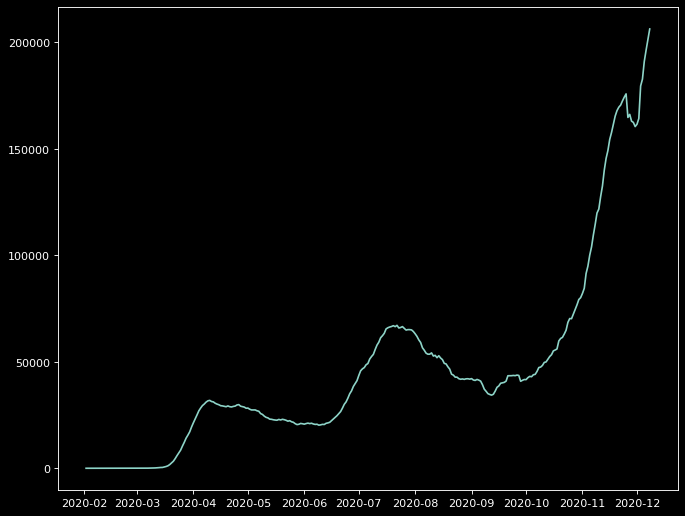

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/10/20


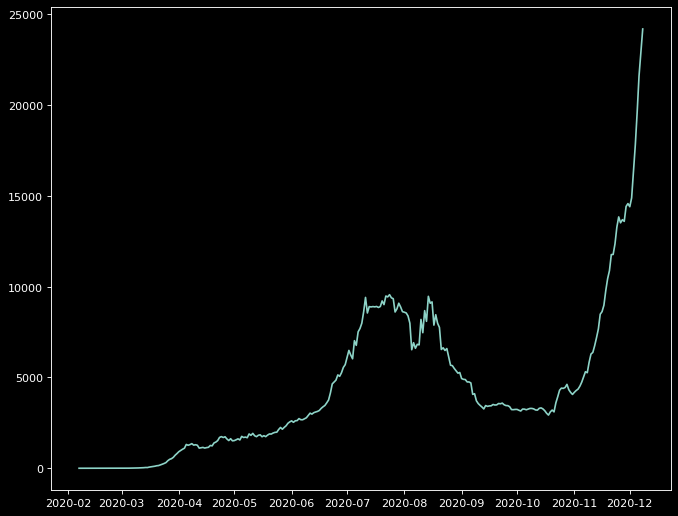

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/10/20


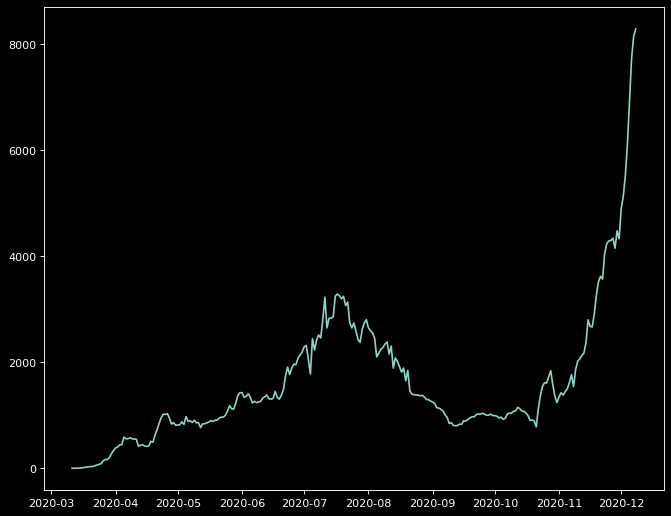

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()